In [9]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "c:\\git\\hands_on_ml_link"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("c:\\git\\hands_on_ml_link","datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

np.random.seed(42)

import numpy as np

# 예시를 위해서 만든 것입니다. 사이킷런에는 train_test_split() 함수가 있습니다.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)


from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임이 반환됩니다.
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# 소득 카테고리 개수를 제한하기 위해 1.5로 나눕니다.
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# 5 이상은 5로 레이블합니다.
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

housing = strat_train_set.copy()

housing = strat_train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = strat_train_set["median_house_value"].copy()

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop('ocean_proximity', axis=1)\
    
imputer.fit(housing_num)
housing_num.median().values
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

housing_cat = housing['ocean_proximity']
housing_cat_encoded, housing_categories = housing_cat.factorize()
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(categories='auto')
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
cat_encoder = OneHotEncoder(categories='auto', sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
cat_encoder.categories_
housing_cat = housing[['ocean_proximity']]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
cat_encoder = OneHotEncoder(categories='auto', sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs, 
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(categories='auto'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 만듭니다.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])
full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_encoder", OneHotEncoder(categories='auto'), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)


df = pd.DataFrame(np.arange(10, 22).reshape(3, 4),
                  index=["a", "b", "c"],
                  columns=["A", "B", "C", "D"])

# Chapter 2. 머신러닝 프로젝트 처음부터 끝까지
---

---
## 2.6 모델 선택과 훈련

### 2.6.1 훈련 세트에서 훈련하고 평가하기

- 선형 회귀 모델을 훈련

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()    # 선형 회귀 모델
lin_reg.fit(housing_prepared, housing_labels)   # 훈련, 매개변수(Train data, Target values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- 훈련 세트에 있는 몇 개 샘플에 대해 적용

In [12]:
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [13]:
some_labels = housing_labels.iloc[:5]
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [14]:
some_data_prepared = full_pipeline.transform(some_data) # 변환 파이프라인(데이터 전처리)
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [15]:
print("예측:", lin_reg.predict(some_data_prepared))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


- 실제 값과 비교

In [16]:
print("레이블:", list(some_labels))

레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


- 사이킷런의 mean_square_error 함수를 사용
- 전체 훈련 세트에 대한 이 회귀 모델의 **RMSE**(평균 제곱근 오차<sup>Root Mean Square Error</sup>) 측정

In [17]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

- 대부분 중간 주택 가격은 120,000에서 265,000 사이
- 예측 오차가 68,628인 것은 훈련 데이터에 과소적합된 사례
- 과소적합을 해결하는 주요 방법
  - 더 강력한 모델을 선택
  - 훈련 알고리즘에 더 좋은 특성을 주입
  - 모델의 규제를 감소(이 모델은 규제 사용 X)

- 먼저 더 복잡한 모델인 DecisionTreeRegressor 모델을 시도
- 이 모델은 강력하고 데이터에서 복잡한 비선형 관계를 찾을 수 있음

In [18]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

- 이 모델은 데이터에 과대적합됨
- 훈련에 사용한 데이터를 예측에 그대로 사용하였기 때문

### 2.6.2 교차 검증을 사용한 평가

- 모델을 평가하기 위해 사이킷런의 **교차 검증** 기능인 **K-겹 교차 검증**<sup>K-fold cross-validation</sup>을 수행
- 훈련 세트를 **폴드**<sup>fold</sup>라 불리는 10개의 서브셋으로 무작위 분할 후, 10번 훈련하고 평가
- 매번 다른 폴드 선택해 평가에 사용, 나머지는 훈련에 사용
- 10개의 평가 점수가 담긴 배열이 결과가 됨

![k-fold_cross_validation](./images/k-fold_cross_validation.PNG)
**<center>k-fold_cross_validation</center>**

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) # 사이킷런 교차검증의 score는 비용 함수가 아니라 효용 함수이므로 RMSE를 나타내기 위해 -를 붙임

def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(tree_rmse_scores)

점수: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
평균: 71407.68766037929
표준편차: 2439.4345041191004


- 결정 트리 결과가 이전보다 나빠진 것을 볼 수 있다.
- 교차 검증으로 모델의 성능 추정뿐 아니라 이 추정이 얼마나 정확한지(즉, 표준편차) 측정 가능

- 선형 회귀 모델과 비교

In [20]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준편차: 2731.674001798349


- 확실히 결정 트리 모델이 과대적합되어 선형 회귀 모델보다 성능이 나쁘다.

- 마지막으로 RandomForestRegressor 모델 시도
  - 특성을 무작위 선택하여 많은 결정 트리 만들고 그 예측을 평균낸다.
  - 여러 다른 모델을 모아서 하나의 모델을 만드는 것을 **앙상블 학습**이라고 함
  - 머신러닝 알고리즘의 성능을 극대화하는 방법 중 하나

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21933.31414779769

In [22]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [51646.44545909 48940.60114882 53050.86323649 54408.98730149
 50922.14870785 56482.50703987 51864.52025526 49760.85037653
 55434.21627933 53326.10093303]
평균: 52583.72407377466
표준편차: 2298.353351147122


- 이전 두 모델보다 훌륭함
- 하지만, 훈련 세트에 대한 점수가 검증 세트에 대한 점수보다 낮으므로 이 모델도 과대적합되어 있음
- 과대적합을 해결하는 방법
  - 모델을 간단히 함
  - 제한을 함(즉, 규제)
  - 더 많은 훈련 데이터를 모음
- 하나의 모델을 더 깊이 들어가기 전에, 다양한 모델을 시도해 가능성 있는 2~5개 정도의 모델을 선정하는 것이 좋다.

---
## 2.7 모델 세부 튜닝

### 2.7.1 그리드 탐색

- 사이킷런의 GridSearchCV 사용
- 탐색하고자 하는 하이퍼파라미터와 시도해볼 값을 지정하면 가능한 모든 하이퍼파라미터 조합에 대해 교차 검증을 사용해 평가함

- 다음 코드는 RandomForestRegressor에 대한 최적의 하이퍼파라미터 조합을 탐색함

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합을 시도합니다.
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 폴드에서 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_features': [2, 4, 6, 8], 'n_estimators': [3, 10, 30]}, {'max_features': [2, 3, 4], 'bootstrap': [False], 'n_estimators': [3, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

최상의 파라미터 조합:

In [24]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

- 8과 30은 탐색 범위의 최댓값이기 때문에 계속 점수가 향상될 가능성이 있으므로 더 큰 값으로 다시 검색해야 함

In [23]:
param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합을 시도합니다.
    {'n_estimators': [30, 70, 80, 90], 'max_features': [7, 8, 9]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 폴드에서 훈련하면 총 (12+6)*5=90번의 훈련이 일어납니다.
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

{'max_features': 8, 'n_estimators': 80}

최적의 추정기에 직접 접근할 수도 있음

In [25]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

그리드서치에서 테스트한 하이퍼파라미터 조합의 점수를 확인합니다:

In [26]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'max_features': 2, 'bootstrap': False, 'n_estimators': 3}
54658.14484390074 {'max_features': 2, 'bootstrap': False, 'n_estimators': 10}
59470.399594730654 {'max_features': 3, 'bootstrap': False, 'n_estimators': 3}
52725.01091081235 {'max_features': 3, 'bootstrap': False, 'n_estimators'

위 예에서는 max_features 하이퍼파라미터가 8, n_estimators 하이퍼파라미터가 80일 때 최적의 솔루션입니다.

### 2.7.2 랜덤 탐색

- 그리드 탐색 방법은 비교적 적은 수의 조합을 탐구할 때 좋다.
- 하지만 하이퍼파라미터 **탐색 공간**이 커지면 RandomizedSearchCV를 사용하는 편이 더 좋다.
- RandomizedSearchCV는 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가
- 주요 장점
  - 랜덤 탐색을 1,000회 반복하도록 실행하면 하이퍼파라미터마다 각기 다른 1,000개의 값을 탐색
  - 단순히 반복 횟수를 조절하는 것만드로 하이퍼파라미터 탐색에 투입할 컴퓨팅 자원을 제어할 수 있음

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49150.657232934034 {'max_features': 7, 'n_estimators': 180}
51389.85295710133 {'max_features': 5, 'n_estimators': 15}
50796.12045980556 {'max_features': 3, 'n_estimators': 72}
50835.09932039744 {'max_features': 5, 'n_estimators': 21}
49280.90117886215 {'max_features': 7, 'n_estimators': 122}
50774.86679035961 {'max_features': 3, 'n_estimators': 75}
50682.75001237282 {'max_features': 3, 'n_estimators': 88}
49608.94061293652 {'max_features': 5, 'n_estimators': 100}
50473.57642831875 {'max_features': 3, 'n_estimators': 150}
64429.763804893395 {'max_features': 5, 'n_estimators': 2}


랜덤 탐색을 10회 반복하여 찾은 최적의 하이퍼파라미터는 max_features가 7, n_estimators가 180입니다.

### 2.7.3 앙상블 방법

- 많은 결정 트리를 만들고 그 예측을 평균 내는 결정 트리의 앙상블인 랜덤 포레스트
- 랜덤 포레스트가 결정 트리 하나보다 더 성능이 좋은 것처럼 모델의 그룹이 단일 모델보다 더 나은 성능을 발휘할 때가 많다.
- 이 주제는 7장에서 자세히 살펴봄

### 2.7.4 최상의 모델과 오차 분석

- 최상의 모델을 분석하면 문제에 대한 좋은 통찰을 얻는 경우가 많습니다.
- RandomForestRegressor가 각 특성의 상대적은 중요도를 알려줍니다.
- 이 정보를 바탕으로 덜 중요한 특성들을 제외할 수 있습니다.

In [31]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [32]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [33]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [34]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [35]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3661589806181342, 'median_income'),
 (0.1647809935615905, 'INLAND'),
 (0.10879295677551573, 'pop_per_hhold'),
 (0.07334423551601242, 'longitude'),
 (0.0629090704826203, 'latitude'),
 (0.05641917918195401, 'rooms_per_hhold'),
 (0.05335107734767581, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402767, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407807, 'households'),
 (0.014106483453584102, 'total_bedrooms'),
 (0.010311488326303787, '<1H OCEAN'),
 (0.002856474637320158, 'NEAR OCEAN'),
 (0.00196041559947807, 'NEAR BAY'),
 (6.028038672736599e-05, 'ISLAND')]

### 2.7.5 테스트 세트로 시스템 평가하기

- 어느 정도 모델을 튜닝하여 만족할 만한 모델을 얻게 되면 테스트 세트에서 최종 모델을 평가함

In [36]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1) # 예측 변수
y_test = strat_test_set["median_house_value"].copy() # 레이블

X_test_prepared = full_pipeline.transform(X_test) # 데이터 변환
final_predictions = final_model.predict(X_test_prepared) # 예측

# 평가
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47730.22690385927

---
## 2.8 론칭, 모니터링, 그리고 시스템 유지 보수

- 이제 제품 시스템에 적용하기 위한 준비를 해야함
  - 입력 데이터 소스를 우리 시스템에 연결하고 테스트 코드를 작성
  - 일정 간격으로 시스템의 실시간 성능을 체크하고 성능이 떨어졌을 때 알람을 통지할 수 있는 모니터링 코드를 작성
  - 시스템의 예측을 샘플링해서 평가함, 이런 과정에는 사람의 분석이 필요
  - 시스템의 입력 데이터 품질 평가
  - 마지막으로 새로운 데이터를 사용해 정기적으로 모델을 훈련, 가능하면 이 과정은 자동화함

---
## 2.10 연습문제

#### 1. 서포트 벡터 머신 회귀(sklearn.svm.SVR)를 kernel=“linear”(하이퍼파라미터 C를 바꿔가며)나 kernel=“rbf”(하이퍼파라미터 C와 gamma를 바꿔가며) 등의 다양한 하이퍼파라미터 설정으로 시도해보세요. 지금은 이 하이퍼파라미터가 무엇을 의미하는지 너무 신경 쓰지 마세요. 최상의 SVR 모델은 무엇인가요?

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           verbose=0, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

C:\Users\link-Hwang\Anaconda3\envs\mlbook\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0], 'kernel': ['linear']}, {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
C:\Users\link-Hwang\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 14.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['linear'], 'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]}, {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

최상 모델의 (5-폴드 교차 검증으로 평가한) 점수는 다음과 같습니다:

In [38]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70363.90313964167

최상의 하이퍼파라미터를 확인해 보겠습니다:

In [35]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

---
#### 2. GridSearchCV를 RandomizedSearchCV로 바꿔보세요.

In [37]:
from scipy.stats import expon

# 노트: kernel 매개변수가 "linear"일 때는 gamma가 무시됩니다.
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': randint(low=10000, high=100000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=-1, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.5min
C:\Users\link-Hwang\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 25.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015D179A2CC0>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015D179A2B38>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

여기서 사용된 scale=1.0인 지수 분포를 살펴보겠습니다. 일부 샘플은 1.0보다 아주 크거나 작습니다. 하지만 로그 분포를 보면 대부분의 값이 exp(-2)와 exp(+2), 즉 0.1과 7.4 사이에 집중되어 있음을 알 수 있습니다.

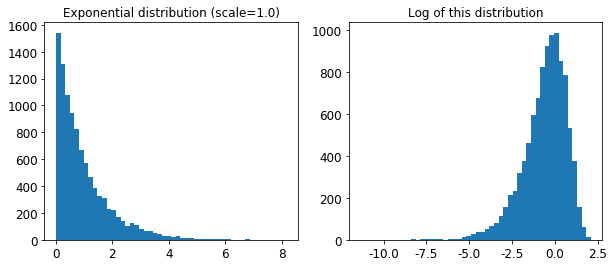

In [54]:
from scipy.stats import expon, reciprocal

expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42) # 무작위 변수 10000개 생성
plt.figure(figsize=(10, 4)) # 그래프의 가로, 세로 크기 지정
plt.subplot(121) # 한 화면에 여러 그래프를 나눠서 그려줌, 1행 2열로 잡은 공간에서 1번째
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50) # 데이터 집계할 구간
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

최상 모델의 (5-폴드 교차 검증으로 평가한) 점수는 다음과 같습니다:

In [39]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

55325.2999140845

최상의 하이퍼파라미터를 확인해 보겠습니다:

In [40]:
rnd_search.best_params_

{'C': 99475, 'gamma': 0.37354658165762367, 'kernel': 'rbf'}

---
#### 3. 가장 중요한 특성을 선택하는 변환기를 준비 파이프라인에 추가해보세요.

변환기는 fit(), transform(), fit_transform() 메서드를 구현한 파이썬 클래스를 만들면 됩니다. 마지막 메서드는 TransformerMinxin을 상속하면 자동으로 생성됩니다. 또한 BaseEstimator를 상속하면 하이퍼파라미터 튜닝에 필요한 두 메서드( get_params()와 set_params() )를 추가로 얻게 됩니다. get_params()와 set_params() 함수는 사이킷런의 파이프라인과 그리드 탐색에 꼭 필요한 메서드이므로 모든 추정기와 변환기는 BaseEstimator를 상속해야 합니다.

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

이 특성 선택 클래스는 이미 어떤 식으로든 특성 중요도를 계산했다고 가정합니다

In [66]:
np.argpartition([1,3,5,7,9,2,4,6,8], -4)[-4:] # 상위 4개 인덱스 반환

array([7, 3, 8, 4], dtype=int64)

In [47]:
k = 5 # 선택할 특성의 개수를 지정

# 최상의 k개 특성의 인덱스를 확인
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12], dtype=int64)

In [48]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

최상의 k개 특성이 맞는지 다시 확인합니다:

In [49]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.374854035523309, 'median_income'),
 (0.15818192974693593, 'INLAND'),
 (0.1105746932768499, 'pop_per_hhold'),
 (0.06996685111737724, 'longitude'),
 (0.06341900303356328, 'latitude')]

이제 이전에 정의한 준비 파이프라인과 특성 선택기를 추가한 새로운 파이프라인을 만듭니다:

In [78]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

처음 3개 샘플의 특성을 확인해 보겠습니다:

In [79]:
housing_prepared_top_k_features[0:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

---
#### 4. 전체 데이터 준비 과정과 최종 예측을 하나의 파이프라인으로 만들어보세요.

In [90]:
prepare_select_and_SVRpredict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 7)),
    ('svm_reg', SVR(**rnd_search.best_params_)) #RandomizedSearchCV로 구한 best 하이퍼파라미터(딕셔너리 **)를 매개변수로 넘겨줌
])
prepare_select_and_SVRpredict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 't... gamma=0.37354658165762367, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))])

몇 개의 샘플에 전체 파이프라인을 적용해 보겠습니다:

In [91]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("예측:\t", prepare_select_and_SVRpredict_pipeline.predict(some_data))
print("레이블:\t\t", list(some_labels))

예측:	 [188713.43230038 360472.01091988 171934.54128572  50446.19487884]
레이블:		 [286600.0, 340600.0, 196900.0, 46300.0]


위에는 서포트 벡터 머신 회귀(SVR)을 사용, 아래는 RandomForestRegressor를 사용

In [92]:
prepare_select_and_RFRpredict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, 7)),
    ('forest_reg', RandomForestRegressor(max_features=7, n_estimators=180))
])
prepare_select_and_RFRpredict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 't...tors=180, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False))])

In [93]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("예측:\t", prepare_select_and_RFRpredict_pipeline.predict(some_data))
print("레이블:\t\t", list(some_labels))

예측:	 [258577.22222222 341968.34444444 209770.          55635.        ]
레이블:		 [286600.0, 340600.0, 196900.0, 46300.0]


---
#### 5. GridSearchCV를 사용해 준비 단계의 옵션을 자동으로 탐색해보세요.

In [96]:
param_grid = [
        {'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'],
         'feature_selection__k': list(range(1, len(feature_importances) + 1))}
]

grid_search_prep = GridSearchCV(prepare_select_and_SVRpredict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=1)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean, total=   5.2s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean, total=   5.2s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean, total=   5.2s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean, total=   5.2s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean, total=   5.3s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median, total=   5.2s
[CV] feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median, total=   5.2s
[CV] feature_selection

[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean, total=   5.9s
[CV] feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean, total=   5.9s
[CV] feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean, total=   5.9s
[CV] feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean, total=   5.9s
[CV] feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median, total=   5.9s
[CV] feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median, total=   5.9s
[CV] feature_selection

[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean, total=   6.7s
[CV] feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean, total=   6.7s
[CV] feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean, total=   7.2s
[CV] feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean, total=   7.0s
[CV] feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median, total=   7.1s
[CV] feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median, total=   6.9s
[CV] feature_selection

[CV]  feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean, total=  13.9s
[CV] feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean, total=  12.9s
[CV] feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean, total=  12.0s
[CV] feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean, total=  14.1s
[CV] feature_selection__k=10, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=10, preparation__num_pipeline__imputer__strategy=median, total=  13.0s
[CV] feature_selection__k=10, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=10, preparation__num_pipeline__imputer__strategy=median, total=  13.9s
[CV] featur

[CV]  feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean, total=  17.7s
[CV] feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean, total=  14.9s
[CV] feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean, total=  15.7s
[CV] feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean, total=  16.0s
[CV] feature_selection__k=13, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=13, preparation__num_pipeline__imputer__strategy=median, total=  14.7s
[CV] feature_selection__k=13, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=13, preparation__num_pipeline__imputer__strategy=median, total=  15.4s
[CV] featur

[CV]  feature_selection__k=16, preparation__num_pipeline__imputer__strategy=mean, total=  18.1s
[CV] feature_selection__k=16, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=16, preparation__num_pipeline__imputer__strategy=mean, total=  17.0s
[CV] feature_selection__k=16, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=16, preparation__num_pipeline__imputer__strategy=mean, total=  19.4s
[CV] feature_selection__k=16, preparation__num_pipeline__imputer__strategy=mean 
[CV]  feature_selection__k=16, preparation__num_pipeline__imputer__strategy=mean, total=  20.5s
[CV] feature_selection__k=16, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=16, preparation__num_pipeline__imputer__strategy=median, total=  18.3s
[CV] feature_selection__k=16, preparation__num_pipeline__imputer__strategy=median 
[CV]  feature_selection__k=16, preparation__num_pipeline__imputer__strategy=median, total=  20.1s
[CV] featur

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 2029.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preparation', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 't... gamma=0.37354658165762367, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid=[{'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'], 'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [97]:
grid_search_prep.best_params_

{'feature_selection__k': 10,
 'preparation__num_pipeline__imputer__strategy': 'most_frequent'}

최상의 Imputer 정책은 most_frequent이고 16개 중 10개의 특성이 유용합니다.